Column names in the dataset:
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
### Before Hyperparameter Tuning ###


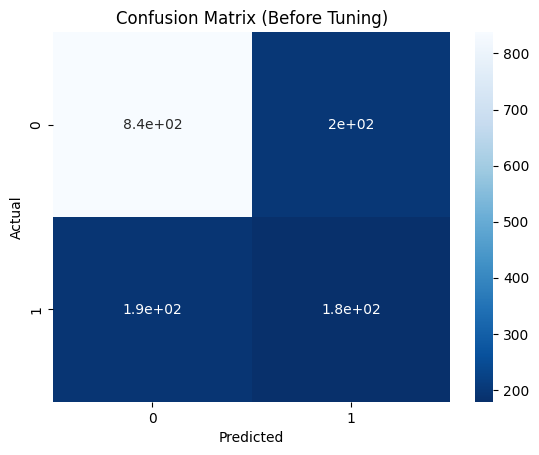

Accuracy (Before Tuning): 0.7218
Precision (Before Tuning): 0.4748
Recall (Before Tuning): 0.4799
F1 Score (Before Tuning): 0.4773

### After Hyperparameter Tuning ###


NameError: name 'cm_after' is not defined

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset into a pandas DataFrame
dataset_path = r'C:\Users\tahsi\OneDrive\Desktop\python_ws\telco-churn.csv'
df = pd.read_csv(dataset_path)

# Check the column names
print("Column names in the dataset:")  # This line should have print() to display properly
print(df.columns)

# Exclude 'customerID' as it is irrelevant for modeling
df = df.drop(['customerID'], axis=1)

# Convert 'TotalCharges' to numeric (handling any errors due to empty strings)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill any missing values in 'TotalCharges'
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# Encode categorical columns using one-hot encoding or label encoding
df = pd.get_dummies(df, drop_first=True)

# Define features and target variable
X = df.drop('Churn_Yes', axis=1)  # Adjust this if your churn column has a different name
y = df['Churn_Yes']  # Target is whether the customer churned or not

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Before Hyperparameter Tuning 
print("### Before Hyperparameter Tuning ###")

# Create a decision tree classifier (default settings)
clf_before = DecisionTreeClassifier()

# Train the model
clf_before.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred_before = clf_before.predict(X_test)

# Create a confusion matrix
cm_before = confusion_matrix(y_test, y_pred_before)

# Visualise the confusion matrix
sns.heatmap(cm_before, annot=True, cmap='Blues_r')
plt.title('Confusion Matrix (Before Tuning)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print evaluation metrics for before tuning
accuracy_before = accuracy_score(y_test, y_pred_before)
precision_before = precision_score(y_test, y_pred_before)
recall_before = recall_score(y_test, y_pred_before)
f1_before = f1_score(y_test, y_pred_before)

print(f"Accuracy (Before Tuning): {accuracy_before:.4f}")
print(f"Precision (Before Tuning): {precision_before:.4f}")
print(f"Recall (Before Tuning): {recall_before:.4f}")
print(f"F1 Score (Before Tuning): {f1_before:.4f}")

# After Hyperparameter Tuning 
print("\n### After Hyperparameter Tuning ###")

# Create a decision tree classifier with hyperparameters
clf_after = DecisionTreeClassifier(max_depth=6, min_samples_split=30, criterion='entropy')

# Train the model
clf_after.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred_after = clf_after.predict(X_test)

# Create a confusion matrix
sns.heatmap(cm_after, annot=True, fmt='g', cmap='Blues')  # fmt='g' to show full numbers
plt.title('Confusion Matrix (After Tuning)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Print evaluation metrics for after tuning
accuracy_after = accuracy_score(y_test, y_pred_after)
precision_after = precision_score(y_test, y_pred_after)
recall_after = recall_score(y_test, y_pred_after)
f1_after = f1_score(y_test, y_pred_after)

print(f"Accuracy (After Tuning): {accuracy_after:.4f}")
print(f"Precision (After Tuning): {precision_after:.4f}")
print(f"Recall (After Tuning): {recall_after:.4f}")
print(f"F1 Score (After Tuning): {f1_after:.4f}")

# Display comparison of both results
print("\n### Performance Comparison ###")
print(f"Accuracy: Before = {accuracy_before:.4f}, After = {accuracy_after:.4f}")
print(f"Precision: Before = {precision_before:.4f}, After = {precision_after:.4f}")
print(f"Recall: Before = {recall_before:.4f}, After = {recall_after:.4f}")
print(f"F1 Score: Before = {f1_before:.4f}, After = {f1_after:.4f}")
